# Prosper Loan
## by (Omar Adel)

## Preliminary Wrangling

>This data set contains several loans with many variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

> Loading Dataset and Making some exploration and data-wrangling.

In [2]:
desired_width = 320
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 81)


loans = pd.read_csv('prosperLoanData.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,41:46.8,640.0,659.0,10/11/2001 0:00,5.0,4.0,12.0,1,24,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,9/12/2007 0:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2/27/2014 8:28,680.0,699.0,3/18/1996 0:00,14.0,14.0,29.0,13,389,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,3/3/2014 0:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,09:10.1,480.0,499.0,7/27/2002 0:00,NaN,NaN,3.0,0,0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,1/17/2007 0:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,10/22/2012 11:02,800.0,819.0,2/28/1983 0:00,5.0,5.0,29.0,7,115,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,11/1/2012 0:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,9/14/2013 18:38,680.0,699.0,2/20/2004 0:00,19.0,19.0,49.0,6,220,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A18036930218888920068

In [3]:
# Identifying the no. of columns & rows.
loans.shape

(113937, 81)

In [4]:
# Checking the number of rows in each variable & the type of these variables.
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# Executing a for loop in order to extract variables with null rows and storing the results in a variable called 'columns'
column_with_nan = loans.columns[loans.isnull().any()]
columns = {}
for column in column_with_nan:
    columns[column] = loans[column].isnull().sum()

columns

{'CreditGrade': 84984,
 'ClosedDate': 58848,
 'BorrowerAPR': 25,
 'EstimatedEffectiveYield': 29084,
 'EstimatedLoss': 29084,
 'EstimatedReturn': 29084,
 'ProsperRating (numeric)': 29084,
 'ProsperRating (Alpha)': 29084,
 'ProsperScore': 29084,
 'BorrowerState': 5515,
 'Occupation': 3588,
 'EmploymentStatus': 2255,
 'EmploymentStatusDuration': 7625,
 'GroupKey': 100596,
 'CreditScoreRangeLower': 591,
 'CreditScoreRangeUpper': 591,
 'FirstRecordedCreditLine': 697,
 'CurrentCreditLines': 7604,
 'OpenCreditLines': 7604,
 'TotalCreditLinespast7years': 697,
 'InquiriesLast6Months': 697,
 'TotalInquiries': 1159,
 'CurrentDelinquencies': 697,
 'AmountDelinquent': 7622,
 'DelinquenciesLast7Years': 990,
 'PublicRecordsLast10Years': 697,
 'PublicRecordsLast12Months': 7604,
 'RevolvingCreditBalance': 7604,
 'BankcardUtilization': 7604,
 'AvailableBankcardCredit': 7544,
 'TotalTrades': 7544,
 'TradesNeverDelinquent (percentage)': 7544,
 'TradesOpenedLast6Months': 7544,
 'DebtToIncomeRatio': 8554,
 

In [6]:
# Creating a new dataset with the desired variables with least null values.
loans_edited = loans[['ListingKey', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'LoanOriginationQuarter', 'MonthlyLoanPayment', 'Investors']]
loans_edited.head()

,ListingKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),EmploymentStatus,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,Investors
0,1021339766868145413AB3B,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,0,Self-employed,"$25,000-49,999",True,3083.333333,0,9425,Q3 2007,330.43,258
1,10273602499503308B223C1,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,7.0,2,Employed,"$50,000-74,999",True,6125.000000,0,10000,Q1 2014,318.93,1
2,0EE9337825851032864889A,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,0,Not available,Not displayed,True,2083.333333,0,3001,Q1 2007,123.32,41
3,0EF5356002482715299901A,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,9.0,16,Employed,"$25,000-49,999",True,2875.000000,0,10000,Q4 2012,321.45,158
4,0F023589499656230C5E3E2,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,4.0,2,Employed,"$100,000+",True,9583.333333,0,15000,Q3 2013,563.97,20


In [7]:
#checking the number of null values in each variable
loans_edited.isnull().sum()

ListingKey                       0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
EstimatedEffectiveYield      29084
EstimatedLoss                29084
EstimatedReturn              29084
ProsperScore                 29084
ListingCategory (numeric)        0
EmploymentStatus              2255
IncomeRange                      0
IncomeVerifiable                 0
StatedMonthlyIncome              0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
LoanOriginationQuarter           0
MonthlyLoanPayment               0
Investors                        0
dtype: int64

In [8]:
# Removing null values from each variable.
loans_edited.dropna(inplace=True)
loans_edited.isnull().sum()

c:\users\007\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ListingKey                   0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
LenderYield                  0
EstimatedEffectiveYield      0
EstimatedLoss                0
EstimatedReturn              0
ProsperScore                 0
ListingCategory (numeric)    0
EmploymentStatus             0
IncomeRange                  0
IncomeVerifiable             0
StatedMonthlyIncome          0
LoanCurrentDaysDelinquent    0
LoanOriginalAmount           0
LoanOriginationQuarter       0
MonthlyLoanPayment           0
Investors                    0
dtype: int64

In [9]:
# Calling the first 6 columns of the new dataset. 
loans_edited.head()

,ListingKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),EmploymentStatus,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,Investors
1,10273602499503308B223C1,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,7.0,2,Employed,"$50,000-74,999",True,6125.000000,0,10000,Q1 2014,318.93,1
3,0EF5356002482715299901A,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,9.0,16,Employed,"$25,000-49,999",True,2875.000000,0,10000,Q4 2012,321.45,158
4,0F023589499656230C5E3E2,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,4.0,2,Employed,"$100,000+",True,9583.333333,0,15000,Q3 2013,563.97,20
5,0F05359734824199381F61D,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,10.0,1,Employed,"$100,000+",True,8333.333333,0,15000,Q4 2013,342.37,1
6,0F0A3576754255009D63151,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,1,Employed,"$25,000-49,999",True,2083.333333,0,3000,Q2 2013,122.67,1


In [10]:
loans_edited.shape

(84853, 20)

In [11]:
loans_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 20 columns):
ListingKey                   84853 non-null object
Term                         84853 non-null int64
LoanStatus                   84853 non-null object
BorrowerAPR                  84853 non-null float64
BorrowerRate                 84853 non-null float64
LenderYield                  84853 non-null float64
EstimatedEffectiveYield      84853 non-null float64
EstimatedLoss                84853 non-null float64
EstimatedReturn              84853 non-null float64
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    84853 non-null int64
EmploymentStatus             84853 non-null object
IncomeRange                  84853 non-null object
IncomeVerifiable             84853 non-null bool
StatedMonthlyIncome          84853 non-null float64
LoanCurrentDaysDelinquent    84853 non-null int64
LoanOriginalAmount           84853 non-null int64
LoanOriginationQuarte

In [12]:
# checking if there're any duplicates in the dataset.
loans_edited.duplicated().sum()

0

In [13]:
# storing the values of ListingCategory inside a dict as I might need them later.
listing_category = {
    0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 
    6:'Auto',7: 'Other', 8:'Baby&Adoption',9: 'Boat', 10: 'Cosmetic Procedure', 11:'Engagement Ring', 12: 'Green Loans', 
    13:'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 
    19:'Vacation', 20:'Wedding Loan'
                    }
listing_category

{0: 'Not Available',
 1: 'Debt Consolidation',
 2: 'Home Improvement',
 3: 'Business',
 4: 'Personal Loan',
 5: 'Student Use',
 6: 'Auto',
 7: 'Other',
 8: 'Baby&Adoption',
 9: 'Boat',
 10: 'Cosmetic Procedure',
 11: 'Engagement Ring',
 12: 'Green Loans',
 13: 'Household Expenses',
 14: 'Large Purchases',
 15: 'Medical/Dental',
 16: 'Motorcycle',
 17: 'RV',
 18: 'Taxes',
 19: 'Vacation',
 20: 'Wedding Loan'}

### What is the structure of your dataset?

>My Dataset consists of 84853 row and 20 columns 

### What is/are the main feature(s) of interest in your dataset?

>The main features of interest are Loan Amount and Interest Rate on each loan, whether the borrower is employed or not and what his income range is.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. BorrowerRate
2. EmploymentStatus 
3. IncomeRange
4.LoanOriginalAmount
5.EstimatedReturn

## Univariate Exploration

> Starting my explorations with the Income Range Categorical Variable.

### 1. Income Range

In [14]:
#choosing the values and re-arranging them.
income_range = ['$100,000+','$75,000-99,999', '$50,000-74,999' , '$25,000-49,999', '$1-24,999', 'Not employed']
IncomeRange = pd.api.types.CategoricalDtype(ordered=True, categories=income_range)
loans_edited['IncomeRange'] = loans_edited['IncomeRange'].astype(IncomeRange)

c:\users\007\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
# checking the count of each value.
income_count = loans_edited.IncomeRange.value_counts()
income_count

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
Name: IncomeRange, dtype: int64

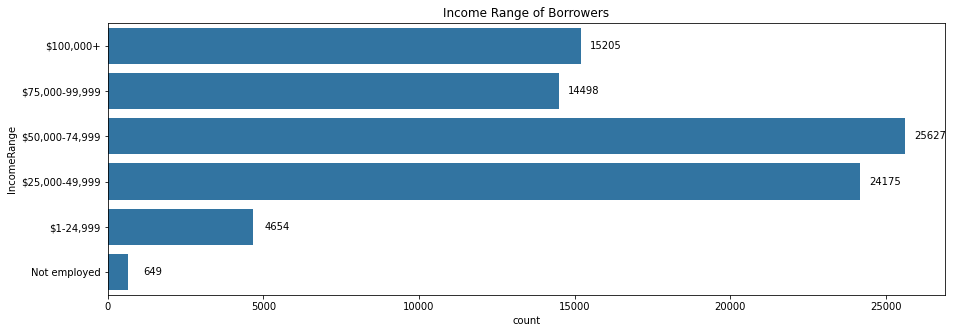

In [16]:
# creating a countplot and adding a text of value counts beside each bar.
plt.figure(figsize=[15,5])
plt.title('Income Range of Borrowers')
base_color = sb.color_palette()[0]
sb.countplot(data=loans_edited, y='IncomeRange', color=base_color);
for i in range(income_count.shape[0]):
        count = income_count[i]
        plt.text(count + 800, i, count, va='center', ha='center')

 > 1. We can observe two trends. The first one is the majority of borrowers applying for loans have an income range between 25k to 75k with Income Range between 50 to 75 in the first place.
> 2. The Second trend is between 75k to 100+.

### 2. Income Verifiable (No. of People income documentation support)

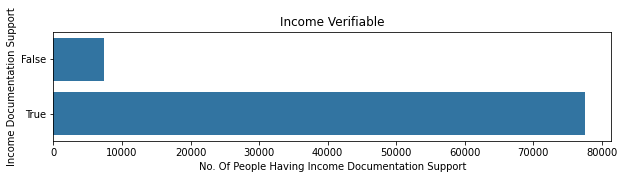

In [17]:
# Creating a countplot with IncomeVerifiable Variable
plt.figure(figsize=[10,2])
plt.title('Income Verifiable')
base_color = sb.color_palette()[0]
sb.countplot(data=loans_edited, y='IncomeVerifiable', color=base_color);
plt.xlabel('No. Of People Having Income Documentation Support')
plt.ylabel('Income Documentation Support');

> We can observe that almost everyone has a documentation supporting their income range.

### 3. Monthly Loan Payment(The Amount due each month)

In [18]:
# Checking the five-number summary of the variable in order to use it in bins.
loans_edited.MonthlyLoanPayment.describe()

count    84853.000000
mean       291.930720
std        186.678314
min          0.000000
25%        157.330000
50%        251.940000
75%        388.350000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

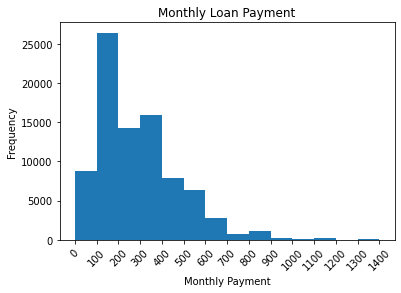

In [19]:
# Creating a histogram with modified bins and x-axis ticks.
plt.title('Monthly Loan Payment')
ticks = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400]
bins = np.arange(0, 1500, 100)
plt.hist(data=loans_edited, x='MonthlyLoanPayment', bins=bins)
plt.xticks(ticks, rotation=45)
plt.xlabel('Monthly Payment')
plt.ylabel('Frequency');

> We can observe that the figure is right-skewed with a high frequency in the monthly payments between 100-200

### 4. Loan Original Amount

In [20]:
# Checking the five-number summary of the variable in order to use it in bins.
loans_edited.BorrowerRate.describe()

count    84853.000000
mean         0.196022
std          0.074631
min          0.040000
25%          0.135900
50%          0.187500
75%          0.257400
max          0.360000
Name: BorrowerRate, dtype: float64

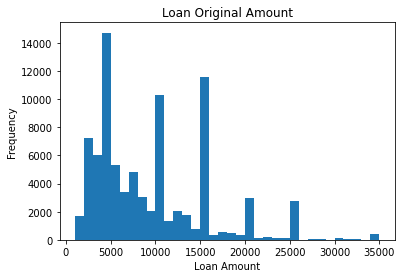

In [21]:
# Creating a histogram with modified bins.
plt.title('Loan Original Amount')
bins = np.arange(1000,35000+1000, 1000)
plt.hist(data=loans_edited, x='LoanOriginalAmount', bins=bins)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency');

>We can observe that the most freqeunt Loan Amount lies in the 5k area followed by 15k and 10k.

### 5. Borrower Interest Rate

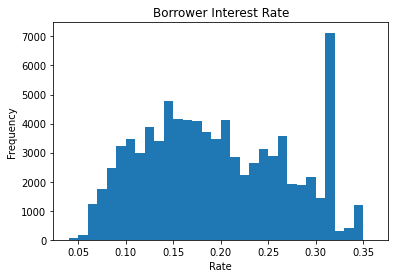

In [22]:
# Creating a histogram with modified bins.
plt.title('Borrower Interest Rate')
bins = np.arange(0.04, 0.36+0.01, 0.01)
plt.hist(data=loans_edited, x='BorrowerRate', bins=bins);
plt.xlabel('Rate')
plt.ylabel('Frequency');

>The plot is almost normally distributed with a spike in interest rate of 32% with interest rates ranged between 0.10 and 0.25

### 6. Term (The Duration of Loan)

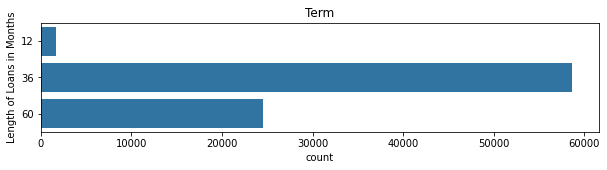

In [23]:
plt.figure(figsize=[10,2])
plt.title('Term')
base_color = sb.color_palette()[0]
sb.countplot(data=loans_edited, y='Term', color=base_color);
plt.ylabel('Length of Loans in Months');

> We can observe that 36 Months - Term has occured the most, with 60 Months coming in the second place and 12 months is the least occurring. This means that almost every loan is a 3 years loan

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The only tansformation I've peformed was rearranging the IncomeRange cateogries as it looked messy and removing the '0' cateogry from that column as it made no sense.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I didn't expect to find that most of Loan Amounts fall in 5000-15000 range and was expecting higher amounts. I also found out that almost 10k of borrowers haven't verified their income which means they might not be able take their loans.

## Bivariate Exploration

### 1. Do monthly payments increase by the increase in loan amounts?

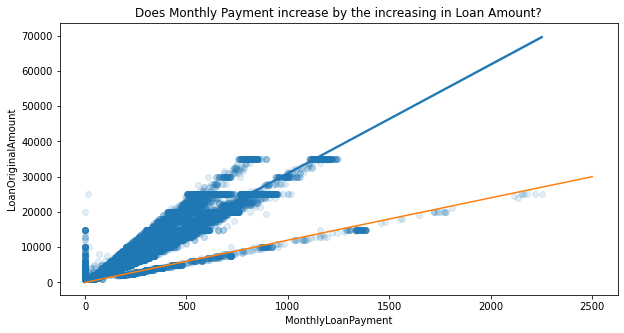

In [24]:
# Creating Scatter Plot with Two Variables.
plt.figure(figsize=(10,5))
plt.title('Does Monthly Payment increase by the increasing in Loan Amount?')
sb.regplot(data=loans_edited, x='MonthlyLoanPayment', y='LoanOriginalAmount', x_jitter=0.5, scatter_kws={'alpha':1/8})
plt.plot([0,2500], [0,30000]);

> There's a postivie relationship between Loan Amount and Monthly Loan Payment as we observe and most of the data falls bettween 1000 Monthly Loan payment and 30000 Loan Original Amount. On the contrary, I made a diagonal to mark the other trend which is Small Loan Amounts can have large monthly payments but that trends lies between 0 - 15000 Loan Original Amounts

### 2. What happens when the number of investors that funding the loan increase? Does that mean an increase in Loan Amount?

In [25]:
# Checking the five-number summary of the variables in order to use it in bins.
loans_edited.Investors.describe(), loans_edited.LoanOriginalAmount.describe()

(count    84853.000000
 mean        68.264669
 std         95.195831
 min          1.000000
 25%          1.000000
 50%         32.000000
 75%         97.000000
 max       1189.000000
 Name: Investors, dtype: float64,
 count    84853.000000
 mean      9083.440515
 std       6287.860058
 min       1000.000000
 25%       4000.000000
 50%       7500.000000
 75%      13500.000000
 max      35000.000000
 Name: LoanOriginalAmount, dtype: float64)

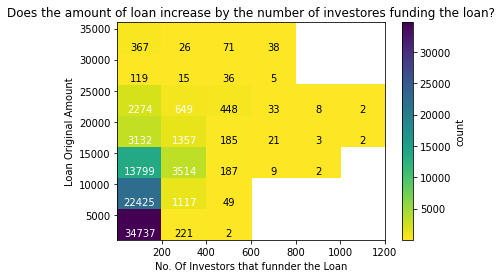

In [26]:
# Creating a Heatmap with a modified bins and add the count inside each square.
plt.title('Does the amount of loan increase by the number of investores funding the loan?')
bins_x=np.arange(1,1200+200,200)
bins_y=np.arange(1000,35000+5000,5000)
h2d=plt.hist2d(data=loans_edited, x='Investors', y='LoanOriginalAmount', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
h2d
cb = plt.colorbar()
cb.set_label('count');
counts = h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c=counts[i,j]
        if c >= 500:
            plt.text(bins_x[i]+100, bins_y[j]+1000, int(c), ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+100, bins_y[j]+1000, int(c), ha='center', va='center', color='black')
plt.xlabel('No. Of Investors that funnder the Loan')
plt.ylabel('Loan Original Amount');

> Most of the investors lies in bottom left of the heat map and there's a weak positive relationship as the no. of investors doesn't increase the origianl amount of Loan.

### 3. How many borrowers have a documentation that support their income?

In [27]:
# creating a new df groupedby IncomeRange and Income Verifiable
income = loans_edited.groupby(['IncomeRange', 'IncomeVerifiable']).size()
income

IncomeRange     IncomeVerifiable
$100,000+       False                1192
                True                14013
$75,000-99,999  False                 859
                True                13639
$50,000-74,999  False                1612
                True                24015
$25,000-49,999  False                2171
                True                22004
$1-24,999       False                 816
                True                 3838
Not employed    False                 645
                True                    4
dtype: int64

In [28]:
# Resetting the index of the df
income = income.reset_index(name='count')
income

,IncomeRange,IncomeVerifiable,count
0,"$100,000+",False,1192
1,"$100,000+",True,14013
2,"$75,000-99,999",False,859
3,"$75,000-99,999",True,13639
4,"$50,000-74,999",False,1612
5,"$50,000-74,999",True,24015
6,"$25,000-49,999",False,2171
7,"$25,000-49,999",True,22004
8,"$1-24,999",False,816
9,"$1-24,999",True,3838


In [29]:
# Creating a pivot table with Income Verifiable in columns and Income Range in rows.
income = income.pivot(index='IncomeRange', columns='IncomeVerifiable', values='count')
income

IncomeVerifiable,False,True
IncomeRange,,
"$100,000+",1192,14013
"$75,000-99,999",859,13639
"$50,000-74,999",1612,24015
"$25,000-49,999",2171,22004
"$1-24,999",816,3838
Not employed,645,4


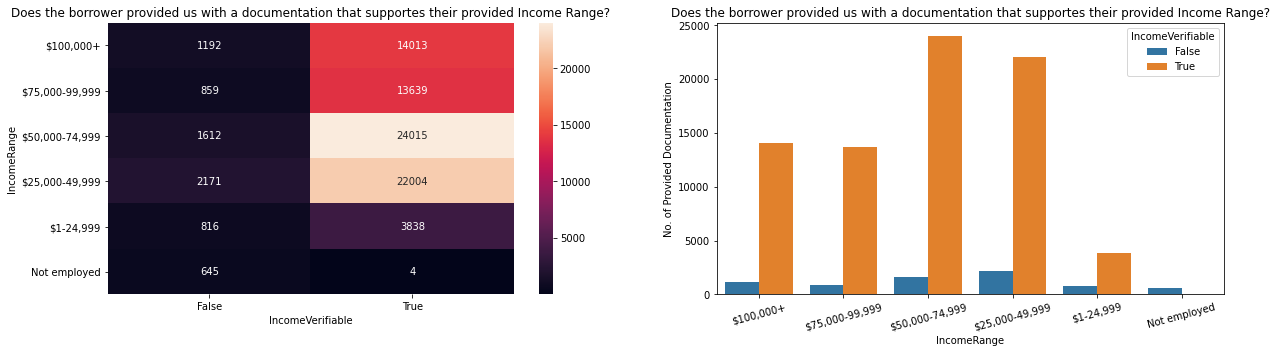

In [30]:
# Creating heatmap and barcharts between two variables.
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Does the borrower provided us with a documentation that supportes their provided Income Range?')
sb.heatmap(income, annot = True, fmt = 'd');
plt.subplot(1,2,2)
plt.title('Does the borrower provided us with a documentation that supportes their provided Income Range?')
sb.countplot(data=loans_edited, x='IncomeRange', hue='IncomeVerifiable')
plt.ylabel('No. of Provided Documentation')
plt.xticks(rotation=15);

>As we can observe mostly almost everyone has provided Income support documents, people with income range lies between 50k to 75k has brought documents then comes people with income range lies between 25k and 50k. 

### 4. Does borrower income range affect the term (duration) of the loan?

In [31]:
# creating a new df groupedby IncomeRange and Term
income_term = loans_edited.groupby(['IncomeRange', 'Term']).size()
income_term

IncomeRange     Term
$100,000+       12        387
                36      10018
                60       4800
$75,000-99,999  12        311
                36       9610
                60       4577
$50,000-74,999  12        432
                36      17259
                60       7936
$25,000-49,999  12        380
                36      17469
                60       6326
$1-24,999       12         77
                36       3789
                60        788
Not employed    12         26
                36        509
                60        114
dtype: int64

In [32]:
# Resetting the index of the df
income_term = income_term.reset_index(name='count')
income_term

,IncomeRange,Term,count
0,"$100,000+",12,387
1,"$100,000+",36,10018
2,"$100,000+",60,4800
3,"$75,000-99,999",12,311
4,"$75,000-99,999",36,9610
5,"$75,000-99,999",60,4577
6,"$50,000-74,999",12,432
7,"$50,000-74,999",36,17259
8,"$50,000-74,999",60,7936
9,"$25,000-49,999",12,380


In [33]:
# Creating a pivot table with Term in columns and Income Range in rows.
income_term = income_term.pivot(index='IncomeRange', columns='Term', values='count')
income_term

Term,12,36,60
IncomeRange,,,
"$100,000+",387,10018,4800
"$75,000-99,999",311,9610,4577
"$50,000-74,999",432,17259,7936
"$25,000-49,999",380,17469,6326
"$1-24,999",77,3789,788
Not employed,26,509,114


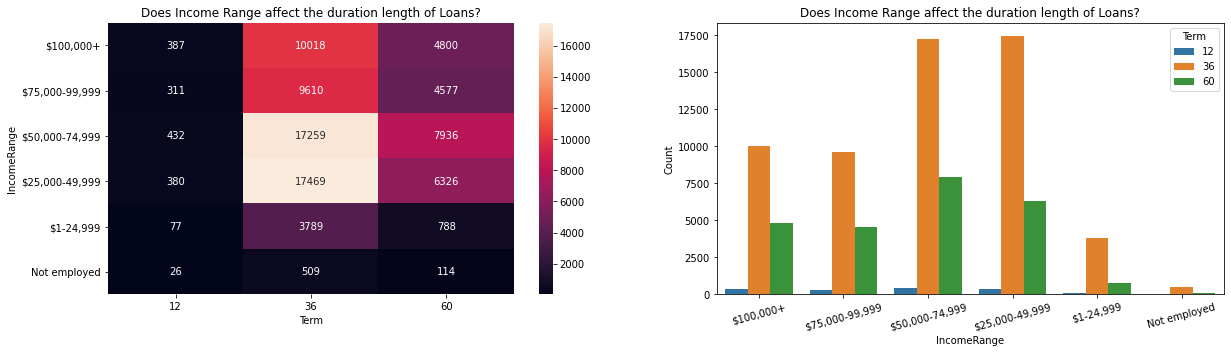

In [34]:
# Creating heatmap and barcharts between two variables.
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Does Income Range affect the duration length of Loans?')
sb.heatmap(income_term, annot = True, fmt = 'd');
plt.subplot(1,2,2)
plt.title('Does Income Range affect the duration length of Loans?')
sb.countplot(data=loans_edited, x='IncomeRange', hue='Term')
plt.ylabel('Count')
plt.xticks(rotation=15);

> We can observe that if you have a high income range that doesn't necessarily mean that you're going for a high term loan. 36 Term has the most count values then comes 60. People with Income Range between 25k and 75k tend to get a loan that has a duration of 36 months. Same goes for each Income Range category.  

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Some features had strong positive relationship like Loan Amount and Monthly Payments, other features has weak realtionship like Loan Amount and The No. of Investors.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> yes, I thought people with High Income Range tend to get Loans with higher duration term but that wasn't true as we can observe in the 4th plot. Most people tend to borrow loan for a durations of 36 months. which means that Term doesn't increase by the increase in Income Range

## Multivariate Exploration

### 1. What is the relationship between Borrower APR, Borrower Rate and Lender Yield?

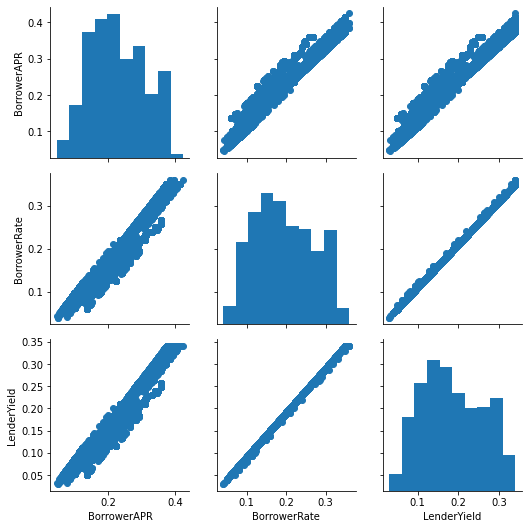

In [35]:
# Creating Multi Plots with 3 varibales.
multiplots = sb.PairGrid(data = loans_edited, vars = ['BorrowerAPR', 'BorrowerRate', 'LenderYield'])
multiplots.map_diag(plt.hist)
multiplots.map_offdiag(plt.scatter);

> There's Strong Positive relation between each one of the 3 variable as we can see the dense straight line between each of the three variables. Borrower Annual Percentage Rate increases when Lender Yield increase and when Borrower Interest Rate increases.

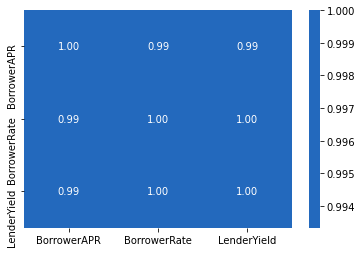

In [36]:
# Heat Corr Map between the three Variables.
rate = loans_edited[['BorrowerAPR', 'BorrowerRate', 'LenderYield']]
sb.heatmap(rate.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

> As interperted above, the correlation between each variable is almost 1 which indicates very strong relationship.

### 2. What impact does Loan Original Amount have on Borrower Interest Rate and Lender Yield?

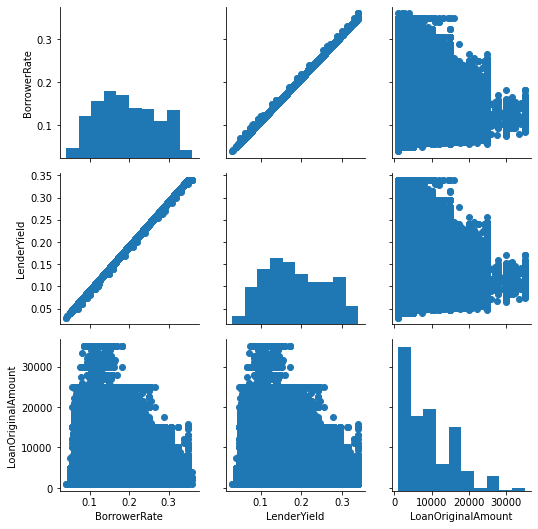

In [37]:
# Creating Multi Plots with 3 varibales.
multiplots = sb.PairGrid(data = loans_edited, vars = ['BorrowerRate', 'LenderYield', 'LoanOriginalAmount'])
multiplots.map_diag(plt.hist)
multiplots.map_offdiag(plt.scatter);

> As we observed above, there was a strong positive relationship between Borrower Rate and Lender Yield. The relationship between Original Loan Amount with either Lender Yield or Borrower Rate is weak negative relationship.

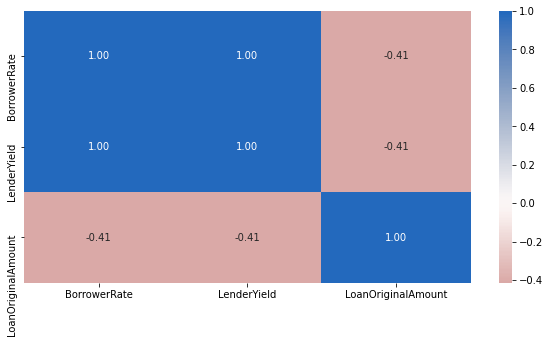

In [38]:
# Heat Corr Map between the three Variables.
loan_rate = loans_edited[['BorrowerRate', 'LenderYield', 'LoanOriginalAmount']]
plt.figure(figsize=(10,5))
sb.heatmap(loan_rate.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

> As interperted above, the correlation between Original Loan Amount and either Borrower Rate or Lender Yield is -0.41 which indicated a weak negative relationship between them.

### 3. Does Stated Monthly Income affect the Monthly Loan Payment or Loan Original Amount?

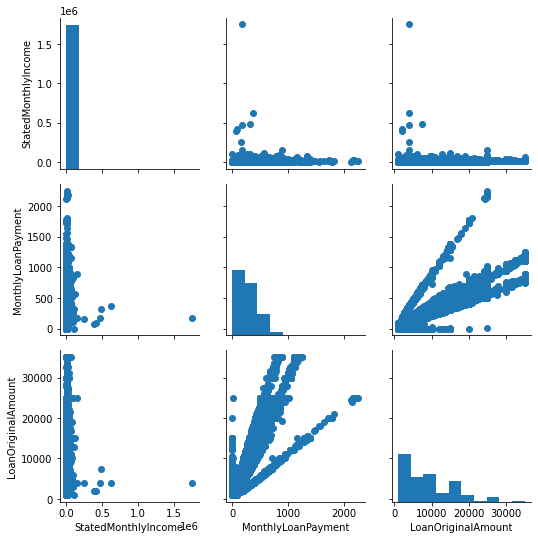

In [39]:
# Creating Multi Plots with 3 varibales.
multiplots = sb.PairGrid(data = loans_edited, vars = ['StatedMonthlyIncome', 'MonthlyLoanPayment', 'LoanOriginalAmount'])
multiplots.map_diag(plt.hist)
multiplots.map_offdiag(plt.scatter);

> We can observe that there's a positive relationship between Monthly Loan Payment and Loan Original Amount. The relationship between stated monthly income and either loan original amount is weak positive relationship which means that stated monthly income has very low effect on Loan Original Amount or Monthly Loan Payment. Most of the values are between 0 and 0.1.

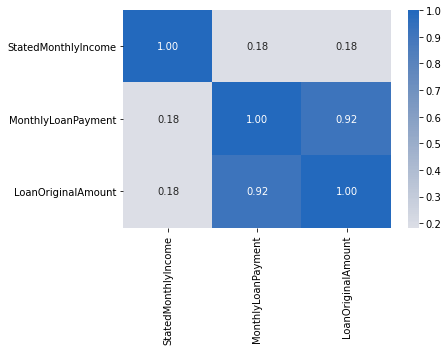

In [40]:
# Heat Corr Map between the three Variables.
monthly_loan = loans_edited[['StatedMonthlyIncome', 'MonthlyLoanPayment', 'LoanOriginalAmount']]
sb.heatmap(monthly_loan.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

> As Interpreted, the correlation between the Stated Monthly Income and either Loan Origianl Amount Or Monthly Loan Payment is weak positive relationship with a correlation of 0.18

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Yes, Some of the features strenghtened each other, like Monthly Loan Payment and Loan Origianl Amount, they had a positive strong relationship and it proved that Monthly payment increases as the Loan Amount increase. Also, Borrower APR, Borrower Interest Rate and Lender Yield, they also had a strong positive relationship and strengthened each other.

### Were there any interesting or surprising interactions between features?

> I was surprised when I saw the relationship between Borrower Interest and Loan Original amount as I thought they might have a strong positive relationship but I think interest rates differs from one loan to another and it doesn't mostly rely on the amount of the Loan.